Task #4
=======

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import scipy.special as spc
import matplotlib.pyplot as plt
sns.set_theme()

import math
import time

#4.1
----
$\xi\sim \mathrm{Cauchy}(x_0,\gamma)$

(-5.0, 5.0)

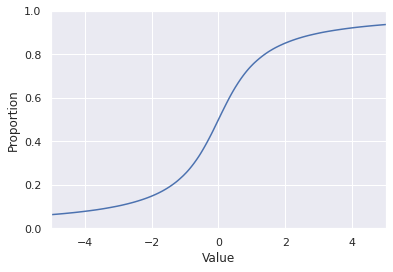

In [3]:
def gen_cauchy(n,x0=0,gamma=1):
    """Generates random sample [X1, X2,.. X_{n}] where Xi ~ Cauchy(x0,gamma)"""
    return x0 + gamma*np.tan(np.pi*(np.random.rand(n) - 1/2))

smp = gen_cauchy(1000000)
graph = sns.ecdfplot({"Value": smp}, x = "Value")
graph.set_xlim([-5,5])

#4.2
----
$\eta \sim \mathcal{N}(0,1)$


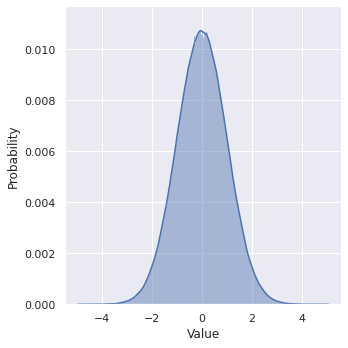

In [4]:
def gen_normal_neu(n):
    """Generates random sample [X1, X2,.. X_{n}] where Xi ~ N(0,1)"""
    bas, X = math.ceil(n/10), np.array([])
    while np.size(X) < n:
        x = gen_cauchy(bas)
        nu = np.random.rand(bas) < np.sqrt(np.e)/2 * (np.e ** (-x**2 / 2)) * (x**2 + 1)
        X = np.concatenate((X,x[nu]))
    X = X[0:n]   
    return X


sns.displot({"Value": gen_normal_neu(1000000)}, x = "Value", stat="probability",
                                            kde=True, kde_kws={"bw_adjust": 1})                                            

#4.3
----
efficiency comarison of standart normal distibution realizations from #3.4 and #4.2

In [24]:
#_______________________________from task3______________________________________
def gen_normal(n):
    """Generates random sample [X1, X2,.. X_{n}] where Xi ~ N(0,1)"""
    eta = np.random.rand(2,n)
    r = -np.sqrt(-2*np.log(eta[0,:]))
    phi = 2*np.pi*eta[1,:]
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return np.array([x,y])
#_______________________________________________________________________________

%timeit -n 1000 gen_normal_neu(1000)
%timeit -n 1000 gen_normal(1000)


555 µs ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
83.6 µs ± 5.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
